In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [2]:
from sklearn.model_selection import train_test_split

# X = features, y = target
X = df.drop('target', axis=1)
y = df['target']

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set:", X_train.shape)
print("Test Set:", X_test.shape)


Training Set: (120, 4)
Test Set: (30, 4)


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression()

# Fit the model
model.fit(X_train_scaled, y_train)
# Predict on test set
y_pred = model.predict(X_test_scaled)

# Show first 5 predictions
print("Predictions:", y_pred[:5])
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Report:\n", classification_report(y_test, y_pred))


Predictions: [1 0 2 1 1]
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [5]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

dt_pred = dt_model.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

svm_pred = svm_model.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

knn_pred = knn_model.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

nb_pred = nb_model.predict(X_test_scaled)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))


Decision Tree Accuracy: 1.0
SVM Accuracy: 1.0
KNN Accuracy: 1.0
Naive Bayes Accuracy: 1.0


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample data for regression
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X, y = data.data, data.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.5558915986952425
R² Score: 0.5757877060324521


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

y_poly_pred = poly_model.predict(X_test)

print("Polynomial Regression R²:", r2_score(y_test, y_poly_pred))
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_ridge_pred = ridge_model.predict(X_test)
print("Ridge Regression R²:", r2_score(y_test, y_ridge_pred))


Polynomial Regression R²: 0.6456819713340498
Ridge Regression R²: 0.5758549611440138


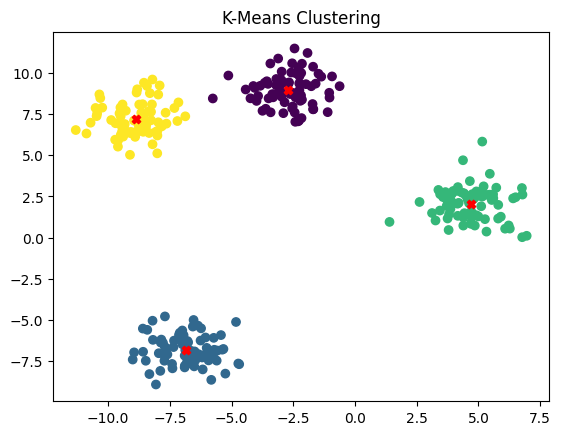

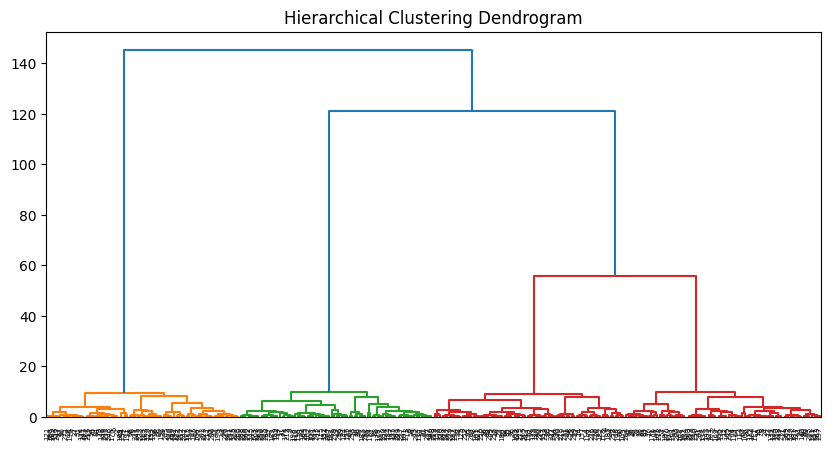

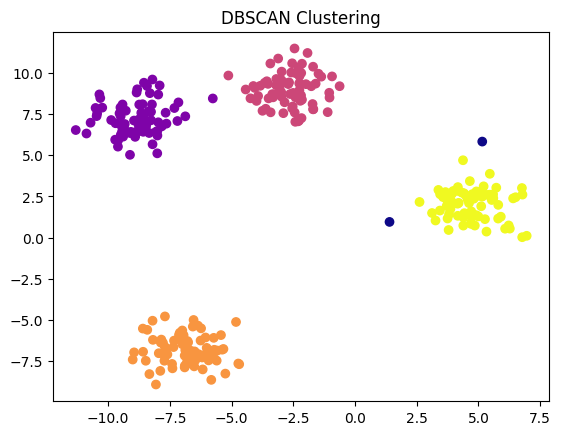

In [8]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Train KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X')
plt.title("K-Means Clustering")
plt.show()
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Fit model
agg_model = AgglomerativeClustering(n_clusters=4)
labels = agg_model.fit_predict(X)

# Plot dendrogram
linked = linkage(X, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()
from sklearn.cluster import DBSCAN

db_model = DBSCAN(eps=1.5, min_samples=5)
labels = db_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()


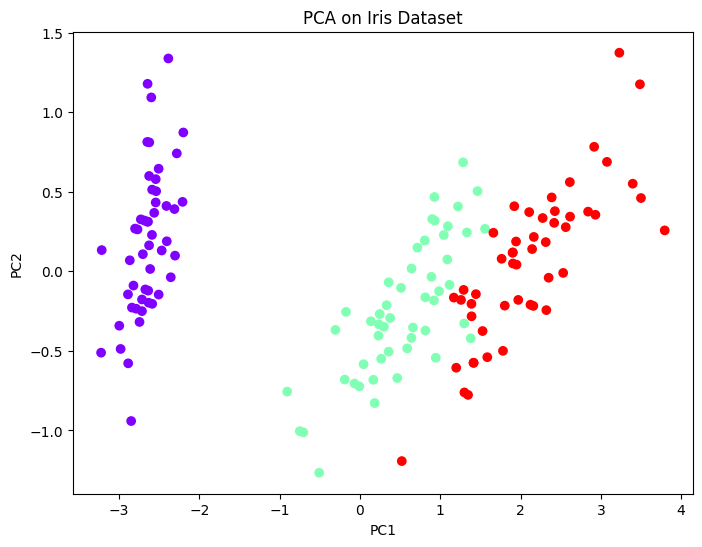

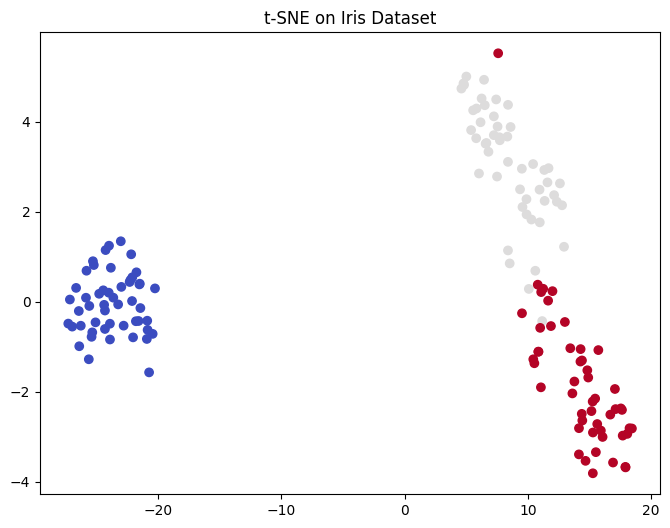

In [9]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA on Iris Dataset')
plt.show()
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm')
plt.title("t-SNE on Iris Dataset")
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]}
grid = GridSearchCV(RandomForestClassifier(), params, cv=3)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

pipe.fit(X_train, y_train)
print("Accuracy:", pipe.score(X_test, y_test))


Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.9666666666666668
Best Parameters: {'max_depth': None, 'n_estimators': 10}
Best Score: 0.9523809523809524
Accuracy: 1.0


In [11]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Train a sample model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save model to file
joblib.dump(model, 'rf_model.joblib')

# Load model back
loaded_model = joblib.load('rf_model.joblib')
print("Accuracy after loading:", loaded_model.score(X_test, y_test))


Accuracy after loading: 1.0
